In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(url)

df["thal"] = df["thal"].map({"normal":0,"fixed":1,"reversible":2})

X = df.drop(columns=["target"])
y = df["target"]

imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_tr, y_tr)

y_pred = gnb.predict(X_te)

print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(y_te, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

# -------- SAMPLE PREDICTION ----------
sample = [57,1,2,140,241,0,1,123,1,0.2,1,0,"reversible"]
sample[12] = {"normal":0,"fixed":1,"reversible":2}[sample[12]]
sample = imputer.transform([sample])
sample = scaler.transform(sample)
pred = gnb.predict(sample)[0]
print("\nSample Prediction:", "Heart Disease" if pred==1 else "No Heart Disease")


Accuracy: 0.9078947368421053

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.94      0.71      0.81        21

    accuracy                           0.91        76
   macro avg       0.92      0.85      0.87        76
weighted avg       0.91      0.91      0.90        76

Confusion Matrix:
 [[54  1]
 [ 6 15]]

Sample Prediction: No Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Accuracy: 0.8552631578947368

Classification Report:
                   precision    recall  f1-score   support

No Heart Disease       0.85      0.96      0.91        55
   Heart Disease       0.86      0.57      0.69        21

        accuracy                           0.86        76
       macro avg       0.86      0.77      0.80        76
    weighted avg       0.86      0.86      0.85        76

Confusion Matrix:
 [[53  2]
 [ 9 12]]


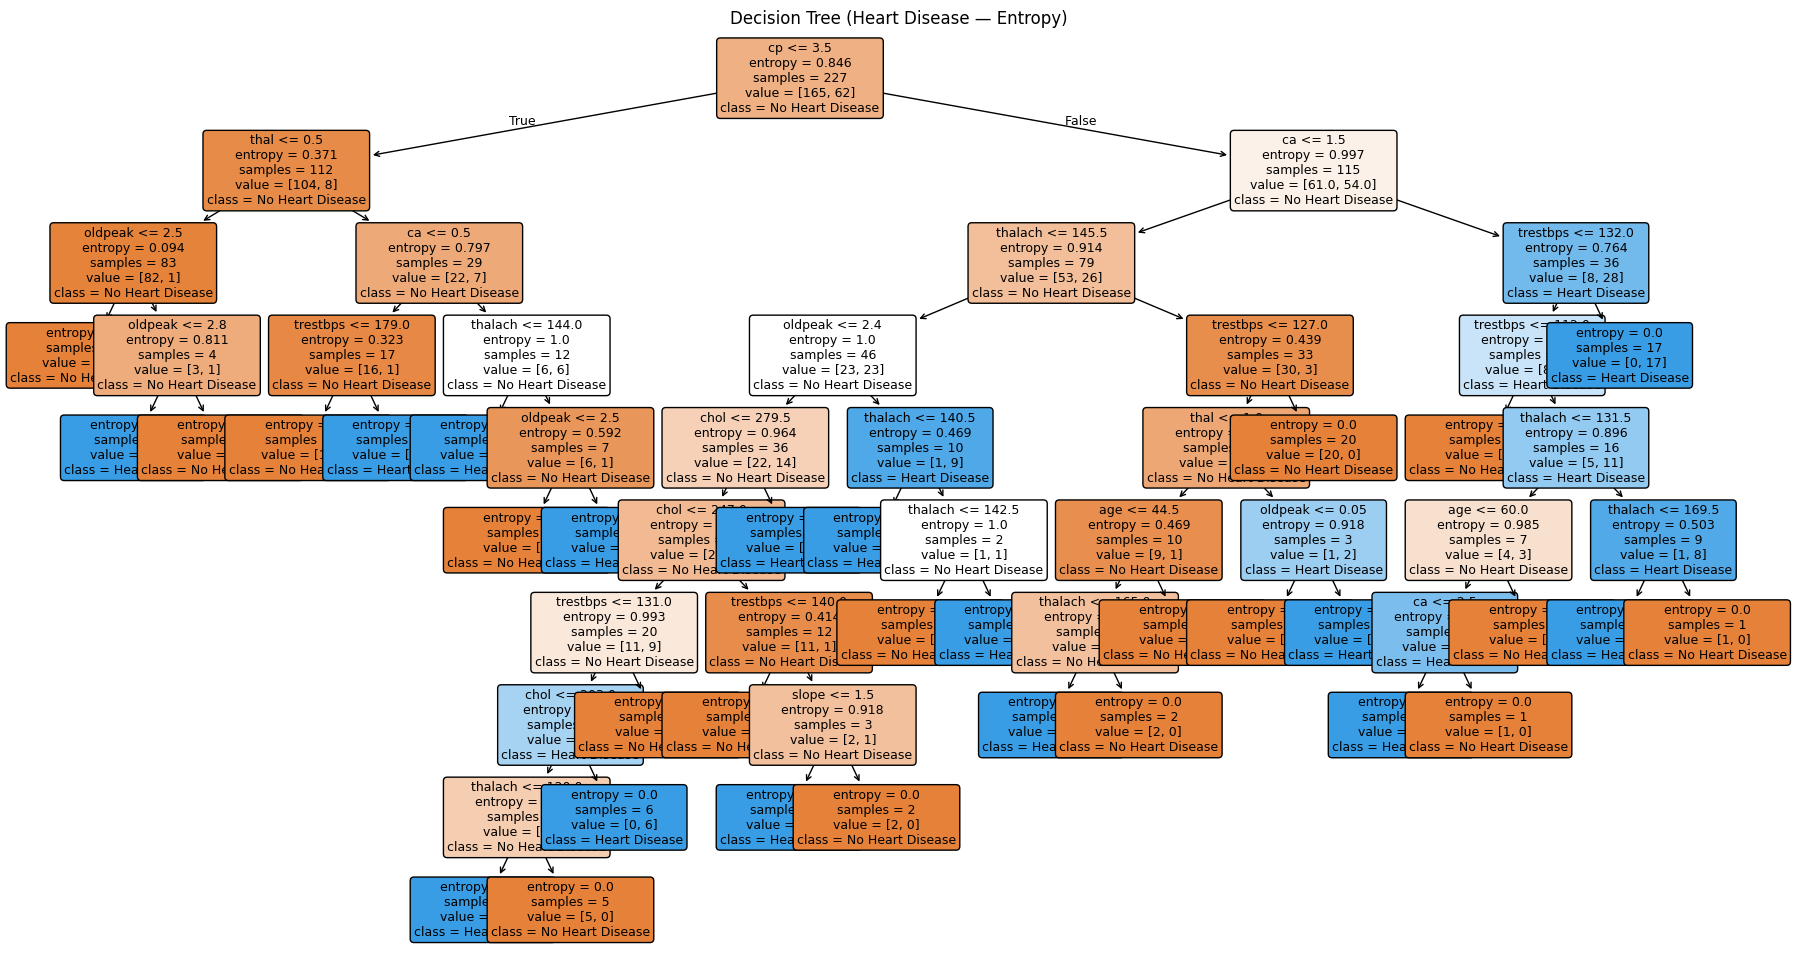


Sample Prediction: No Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [13]:
# ============================
# HEART DISEASE — Decision Tree (with plotted tree + metrics + sample prediction)
# ============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Load
url = "https://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(url)

# 2) Encode 'thal' (categorical)
df["thal"] = df["thal"].map({"normal":0, "fixed":1, "reversible":2})

# 3) Features / target
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg',
                 'thalach','exang','oldpeak','slope','ca','thal']
X = df[feature_names]
y = df['target']

# 4) Impute (trees don't need scaling, but they DO need no-NaNs)
imputer = SimpleImputer(strategy="most_frequent")
X_imp = imputer.fit_transform(X)

# 5) Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_imp, y, test_size=0.25, random_state=42, stratify=y
)

# 6) Train Decision Tree
clf = DecisionTreeClassifier(
    criterion='entropy',   # Information Gain
    random_state=0,
    max_depth=None,        # adjust if you want a smaller tree (e.g., 4)
    min_samples_leaf=1
)
clf.fit(X_tr, y_tr)

# 7) Evaluate on TEST set
y_pred = clf.predict(X_te)
print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(y_te, y_pred,
      target_names=["No Heart Disease","Heart Disease"]))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

# 8) Plot the TREE
plt.figure(figsize=(22, 12))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["No Heart Disease","Heart Disease"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree (Heart Disease — Entropy)")
plt.show()

# 9) Sample prediction (RAW input -> encode 'thal' -> impute -> predict)
sample = [57, 1, 2, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, "reversible"]
sample[12] = {"normal":0, "fixed":1, "reversible":2}[sample[12]]

# impute uses same learned most_frequent values
sample_imp = imputer.transform([sample])

pred = clf.predict(sample_imp)[0]
print("\nSample Prediction:", "Heart Disease" if pred==1 else "No Heart Disease")


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(url)

df["thal"] = df["thal"].map({"normal":0,"fixed":1,"reversible":2})

X = df.drop(columns=["target"])
y = df["target"]

imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_tr, y_tr)

y_pred = mlp.predict(X_te)

print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(y_te, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

sample = [57,1,2,140,241,0,1,123,1,0.2,1,0,"reversible"]
sample[12] = {"normal":0,"fixed":1,"reversible":2}[sample[12]]
sample = imputer.transform([sample])
sample = scaler.transform(sample)
pred = mlp.predict(sample)[0]
print("\nSample Prediction:", "Heart Disease" if pred==1 else "No Heart Disease")


Accuracy: 0.881578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        55
           1       0.88      0.67      0.76        21

    accuracy                           0.88        76
   macro avg       0.88      0.82      0.84        76
weighted avg       0.88      0.88      0.88        76

Confusion Matrix:
 [[53  2]
 [ 7 14]]

Sample Prediction: No Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
